### Global Classifier from Yuanfang

The global classifier from the Yuanfang Paper on the challenge has proven so much more successful than my current model, that I start to believe that the specific monotherapy data are simply better predictors than my chemical features. This would also be a finding<br>
Theory for later: Maybe RFs are not the ideal model to model those curves. What would be more helpful is something that models the sigmoid curves (which is supplied in "Quality data" in dream challenge but not present here)

Send Ammar the dataset as csv in zipped form!!<br><br>

JUSTIFY EVRYTHING YOU DO<br>
Get the gender dummies back<br>
Rplace depth with feat split<br>
use as maximisation metric the scoring function after speeding up the for loops<br>
Proof theory of age being not actually important but just single cell line feature<br>
from astra Data: Also consider disease area

#### First run no advanced cell lines

In [1]:
import numpy as np
import pandas as pd
import _pickle as pkl

In [2]:
data = pd.read_csv("../drugCombDBdata/drugcombs_response.csv") #df1 for smaller set
print(data.shape)

(6103237, 11)


In [3]:
#only nonsense datapoint
data.iloc[6103010]

BlockID        359695
Row                 1
Col                 3
DrugRow           NaN
DrugCol           nih
ConcRow           NaN
ConcCol           NaN
Response          NaN
ConcRowUnit       NaN
ConcColUnit       NaN
source            NaN
Name: 6103010, dtype: object

data = df1[df1["source"]=="ONEIL"]
del df1
print(data.shape)
data.head(2)

In [4]:
#enriching df2 with cell line info
df2 = pd.read_csv("../drugCombDBdata/synergy-score-data/REGRdrugcombs_scored.csv")
cellBlockDf = df2.loc[:,["ID","Cell line"]]
data = data.join(cellBlockDf.set_index("ID"),on="BlockID")
print(data.shape)
data.head(2)

(6103237, 12)


,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
0,1,1,1,5-FU,ABT-888,0.0,0.00,100.000626,uM,uM,ONEIL,A2058
1,1,1,2,5-FU,ABT-888,0.0,0.35,101.993009,uM,uM,ONEIL,A2058


In [14]:
data["BlockID"].head(-3)

NameError: name 'data' is not defined

Actually we want to enrich df2, with data from "data"<br>

In [8]:
print(len(df2))
df2.head()

498865


,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA
0,1,5-FU,ABT-888,A2058,1.72,6.26,-2.75,5.54
1,2,5-FU,ABT-888,A2058,5.88,12.33,3.33,11.61
2,3,5-FU,ABT-888,A2058,3.59,11.66,2.65,10.94
3,4,5-FU,ABT-888,A2058,-0.85,5.15,-3.86,4.43
4,5,5-FU,AZD1775,A2058,12.29,15.77,10.40,18.66


The ID column is exactly the same as the index, but +1. It is equivalent to the BlockID in "data"

In [11]:
monotherapy = data[ (data["ConcRow"]==0) | (data["ConcCol"]==0)]
del data

In [19]:
print(len(monotherapy.BlockID.unique()))
monotherapy.BlockID.unique()

359694


array([     1,      2,      3, ..., 359695, 469611, 469612])

Notice that there are only blocks up to 35965 with 2 more in the end and 3 missing in between

In [8]:
monotherapy1 = monotherapy[monotherapy["BlockID"]==1]
min(monotherapy1[(monotherapy1["Row"]==2)|(monotherapy1["Col"]==2)]['Response'])

101.75352135667578

In [ ]:
for i in range(3):
    print(i)

In [34]:
 #these 3 elements are missing & cause for loop crash
set(range(359696)).difference(set(monotherapy["BlockID"]))

{0, 311725, 312797, 326953}

In [36]:
iterator = [x for x in range(359696) if ((x != 311724) & (x != 312796) & (x != 326952))]
#did not work

In [68]:
monoT

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
2309204,93210,1,1,VARENICLINE,FLUVOXAMINE,0.00,0.0,100.630626,uM,uM,CLOUD,KBM-7
2309205,93210,1,2,VARENICLINE,FLUVOXAMINE,0.00,3.9,79.260836,uM,uM,CLOUD,KBM-7
2309206,93210,2,1,VARENICLINE,FLUVOXAMINE,0.24,0.0,81.859816,uM,uM,CLOUD,KBM-7


In [72]:
max(monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]['Response'])

81.8598163566758

In [67]:
monoT = monotherapy[monotherapy["BlockID"]==93209+1]
monoT

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
2309204,93210,1,1,VARENICLINE,FLUVOXAMINE,0.00,0.0,100.630626,uM,uM,CLOUD,KBM-7
2309205,93210,1,2,VARENICLINE,FLUVOXAMINE,0.00,3.9,79.260836,uM,uM,CLOUD,KBM-7
2309206,93210,2,1,VARENICLINE,FLUVOXAMINE,0.24,0.0,81.859816,uM,uM,CLOUD,KBM-7


In [ ]:
#Started computation at 11:47
#still crashes for all i's from 92208 onwards
#copy this 3 times after having normalised data
max1ab = []
min1ab = []
sum1ab = []
max2ab = []
min2ab = []
sum2ab = []
max3ab = []
min3ab = []
sum3ab = []
max4ab = []
min4ab = []
sum4ab = []
for i in range(359696):
    if i%50000 == 0:
        print(i)
    monoT = monotherapy[monotherapy["BlockID"]==i+1]

    max1ab.append(max(monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]['Response']))
    try:
        max2ab.append(max(monoT[(monoT["Row"]==3)|(monoT["Col"]==3)]['Response']))
    except:
        min3ab.append(0)
    try:
        max3ab.append(max(monoT[(monoT["Row"]==4)|(monoT["Col"]==4)]['Response']))
    except:
        max3ab.append(0)
    try:
        max4ab.append(max(monoT[(monoT["Row"]==5)|(monoT["Col"]==5)]['Response']))
    except:
        max4ab.append(0)
    min1ab.append(min(monoT[(monoT["Row"]==2)|(monoT["Col"]==2)]['Response']))
    try:
        min2ab.append(min(monoT[(monoT["Row"]==3)|(monoT["Col"]==3)]['Response']))
    except:
        min2ab.append(0)
    try:
        min3ab.append(min(monoT[(monoT["Row"]==4)|(monoT["Col"]==4)]['Response']))
    except:
        min3ab.append(0)
    try:
        min4ab.append(min(monoT[(monoT["Row"]==5)|(monoT["Col"]==5)]['Response']))
    except:
        min4ab.append(0)
    sum1ab.append(sum([max1ab[-1],min1ab[-1]]))
    sum2ab.append(sum([max2ab[-1],min2ab[-1]]))
    sum3ab.append(sum([max3ab[-1],min3ab[-1]]))
    sum4ab.append(sum([max4ab[-1],min4ab[-1]]))

0
50000
100000
150000


In [117]:
df2["max1ab"]=pd.Series(max1ab)
df2["min1ab"]=pd.Series(min1ab)
df2["sum1ab"]=pd.Series(sum1ab)
df2["max2ab"]=pd.Series(max2ab)
df2["min2ab"]=pd.Series(min2ab)
df2["sum2ab"]=pd.Series(sum2ab)
df2["max3ab"]=pd.Series(max3ab)
df2["min3ab"]=pd.Series(min3ab)
df2["sum3ab"]=pd.Series(sum3ab)
df2["max4ab"]=pd.Series(max4ab)
df2["min4ab"]=pd.Series(min4ab)
df2["sum4ab"]=pd.Series(sum4ab)

In [ ]:
from datetime import datetime
print(datetime.now())

Next steps:<br>
Normalise Data<br>
do same computation again, build trees, check performances<br>
Cell line representation<br>


In [108]:
max1ab[310005]

104.33881635667578

In [109]:
monotherapy[monotherapy["BlockID"]==310006]

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
5308032,310006,1,1,DACARBAZINE,CELECOXIB,0.0,0.0,100.000626,uM,uM,ALMANAC,UACC-257
5308033,310006,1,2,DACARBAZINE,CELECOXIB,0.0,0.1,97.953170,uM,uM,ALMANAC,UACC-257
5308034,310006,1,3,DACARBAZINE,CELECOXIB,0.0,1.0,101.553924,uM,uM,ALMANAC,UACC-257
5308035,310006,1,4,DACARBAZINE,CELECOXIB,0.0,10.0,98.555621,uM,uM,ALMANAC,UACC-257
5308036,310006,2,1,DACARBAZINE,CELECOXIB,0.5,0.0,104.338816,uM,uM,ALMANAC,UACC-257
5308040,310006,3,1,DACARBAZINE,CELECOXIB,5.0,0.0,106.789336,uM,uM,ALMANAC,UACC-257
5308044,310006,4,1,DACARBAZINE,CELECOXIB,50.0,0.0,106.305405,uM,uM,ALMANAC,UACC-257


In [127]:
# Ammars output files
cellLine_info = pd.read_csv('output/cell_lines_enriched.csv', sep=',', dtype='string')
drug_info = pd.read_csv('output/all_drugs_with_smiles.csv', sep=',', dtype='string')

cat_ohe = pd.get_dummies(cellLine_info.category, prefix='cat')
cellLine_info_full = pd.concat([cellLine_info,cat_ohe], axis=1)

gender_ohe = pd.get_dummies(cellLine_info.gender, prefix='gender')
cellLine_info_full = pd.concat([cellLine_info_full,gender_ohe], axis=1)

cellLine_info_full['age'] = cellLine_info_full['age'].str.replace('Y','').replace('Age unspecified','0')
cellLine_info_full['age'] = cellLine_info_full['age'].astype('int')

cellLine_info_full = cellLine_info_full.drop('cosmicId', 1)
cellLine_info_full = cellLine_info_full.drop('category', 1)
cellLine_info_full = cellLine_info_full.drop('gender', 1)

In [128]:
cellLine_info_full

,cellName,age,cat_Cancer cell line,cat_Embryonic stem cell,cat_Hybridoma,cat_Transformed cell line,gender_Female,gender_Male,gender_Sex unspecified
0,786-0,58,1,0,0,0,0,1,0
1,A498,52,1,0,0,0,0,1,0
2,A549/ATCC,58,1,0,0,0,0,1,0
3,ACHN,22,1,0,0,0,0,1,0
4,CCRF-CEM,4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
99,COLO 858,43,1,0,0,0,0,1,0
100,WM-115,55,1,0,0,0,1,0,0
101,MMAC-SF,39,1,0,0,0,1,0,0
102,MZ7-mel,25,1,0,0,0,1,0,0


In [129]:
df = df2.join(cellLine_info_full.set_index("cellName"),on="Cell line", how="left")#.dropna()

In [131]:
df.dropna().head(2)

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA,max1ab,min1ab,...,min4ab,sum4ab,age,cat_Cancer cell line,cat_Embryonic stem cell,cat_Hybridoma,cat_Transformed cell line,gender_Female,gender_Male,gender_Sex unspecified
0,1,5-FU,ABT-888,A2058,1.72,6.26,-2.75,5.54,101.993009,101.753521,...,60.29323,159.154433,43.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,5-FU,ABT-888,A2058,5.88,12.33,3.33,11.61,101.993009,101.753521,...,60.29323,159.154433,43.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
monotherapy[monotherapy["BlockID"]==154008]

,BlockID,Row,Col,DrugRow,DrugCol,ConcRow,ConcCol,Response,ConcRowUnit,ConcColUnit,source,Cell line
2812064,154008,1,1,FLUDARABINE BASE,DASATINIB,0.00,0.000,100.000626,uM,uM,ALMANAC,ACHN
2812065,154008,1,2,FLUDARABINE BASE,DASATINIB,0.00,0.001,99.289670,uM,uM,ALMANAC,ACHN
2812066,154008,1,3,FLUDARABINE BASE,DASATINIB,0.00,0.010,101.109424,uM,uM,ALMANAC,ACHN
2812067,154008,1,4,FLUDARABINE BASE,DASATINIB,0.00,0.100,88.330621,uM,uM,ALMANAC,ACHN
2812068,154008,2,1,FLUDARABINE BASE,DASATINIB,0.06,0.000,101.079816,uM,uM,ALMANAC,ACHN
2812072,154008,3,1,FLUDARABINE BASE,DASATINIB,0.60,0.000,106.290836,uM,uM,ALMANAC,ACHN
2812076,154008,4,1,FLUDARABINE BASE,DASATINIB,6.00,0.000,96.248405,uM,uM,ALMANAC,ACHN


In [134]:
df.iloc[154007]

ID                                     154008
Drug1                        FLUDARABINE BASE
Drug2                               DASATINIB
Cell line                                ACHN
ZIP                                     -1.34
Bliss                                    3.04
Loewe                                  -47.35
HSA                                       1.0
max1ab                             101.079816
min1ab                               99.28967
sum1ab                             200.369487
max2ab                              92.450836
min2ab                             101.109424
sum2ab                              207.40026
max3ab                              96.248405
min3ab                                    0.0
sum3ab                             184.579026
max4ab                                    0.0
min4ab                                    0.0
sum4ab                                    0.0
age                                      22.0
cat_Cancer cell line              

In [153]:
from sklearn.model_selection import train_test_split

Y = df.dropna().iloc[:,7]
X = df.dropna().iloc[:,8:]

X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scoresTrain = []
scoresTest = []

max_feats = [0.3,0.6,0.9999]
max_depthF = [18,10,6,2]
min_samples_splitF = [2,10,50,250,1250]
no_trees = [5,50,200]

print("starting now")
for k in max_feats:
    localTrain3= []
    localTest3 = []
    for j in max_depthF:
        localTrain2= []
        localTest2 = []
        for i in min_samples_splitF:
            localTrain1= []
            localTest1 = []
            for l in no_trees:
                regressorN = RandomForestRegressor(max_depth=j, max_features=k,
                                               min_samples_split = i, bootstrap=True, n_jobs=-1,
                                               n_estimators=l, verbose=True)
                regressorN.fit(X_train,Y_train)
        
                localTrain1.append(np.mean(np.abs(regressorN.predict(X_train)-Y_train))) #do also train
                localTest1.append(np.mean(np.abs(regressorN.predict(x_test)-y_test))) 
                #del regressorN
            localTrain2.append(localTrain1)
            localTest2.append(localTest1)
        localTrain3.append(localTrain2)
        localTest3.append(localTest2)
        
    scoresTrain.append(localTrain3)
    scoresTest.append(localTest3)

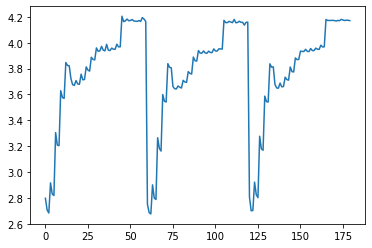

In [158]:
plt.plot(np.array(scoresTrain).flatten())

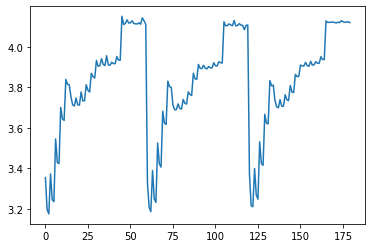

In [157]:
plt.plot(np.array(scoresTest).flatten())

We see:
    1. Num Features does not make a big difference (all 3 look similar)
    2. Max-Depth is the strongest factor so far, more depth better performance
    3. Min Samples split is equally important, only for little samples good performance
    4. More trees are better but 50 to 200 is not that big of a difference anymore already

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scoresTrain = []
scoresTest = []

max_feats = [0.2,0.4,0.9999]
max_depthF = [80,40,20,10]
min_samples_splitF = [2,5,12,30,75]
no_trees = [50]

print("starting now")
for i in min_samples_splitF:
    localTrain3= []
    localTest3 = []
    for j in max_depthF:
        localTrain2= []
        localTest2 = []
        for k in max_feats:
            localTrain1= []
            localTest1 = []
            for l in no_trees:
                regressorN = RandomForestRegressor(max_depth=j, max_features=k,
                                               min_samples_split = i, bootstrap=True, n_jobs=-1,
                                               n_estimators=l, verbose=True)
                regressorN.fit(X_train,Y_train)
        
                localTrain1.append(np.mean(np.abs(regressorN.predict(X_train)-Y_train))) #do also train
                localTest1.append(np.mean(np.abs(regressorN.predict(x_test)-y_test))) 
                #del regressorN
            localTrain2.append(localTrain1)
            localTest2.append(localTest1)
        localTrain3.append(localTrain2)
        localTest3.append(localTest2)
        
    scoresTrain.append(localTrain3)
    scoresTest.append(localTest3)

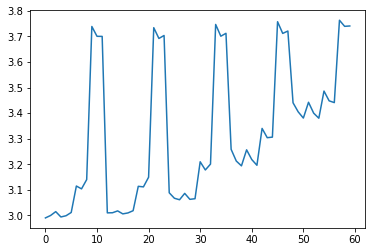

In [166]:
plt.plot(np.array(scoresTest).flatten())

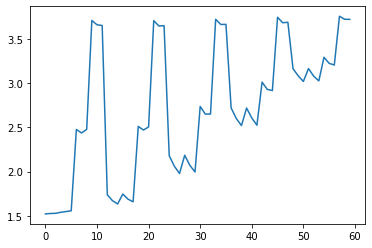

In [167]:
plt.plot(np.array(scoresTrain).flatten())

We see:
1. Min Samples split down to 12 makes decent improvements, overfitting grows with it
2. Max-Depth is the strongest around 40
3. max features is fairly irrelevant but looks like minor gains at 0.4

In [170]:
regressorN = RandomForestRegressor(max_depth=40, max_features=0.5,min_samples_split = 12,
                                   bootstrap=True, n_jobs=-1,n_estimators=40, verbose=True)
regressorN.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished


RandomForestRegressor(max_depth=40, max_features=0.5, min_samples_split=12,
                      n_estimators=40, n_jobs=-1, verbose=True)

In [175]:
pred=regressorN.predict(x_test)
print(np.mean(np.abs(pred-y_test)))
pd.DataFrame([pred,y_test])

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.1s remaining:    1.1s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.1s finished


3.0676929639607544


,0,1,2,3,4,5,6,7,8,9,...,66559,66560,66561,66562,66563,66564,66565,66566,66567,66568
0,-3.285803,1.441518,-0.816661,3.979863,10.439964,10.735005,8.691895,17.311539,1.253442,-9.044599,...,0.909635,-2.224328,2.314903,0.525062,-1.83841,-2.140849,-1.210746,3.44604,9.420397,0.86053
1,0.510000,5.990000,-0.050000,6.870000,8.350000,8.260000,12.160000,12.120000,-4.710000,-9.880000,...,0.680000,-4.150000,1.780000,-1.310000,-6.99000,5.480000,-2.480000,-1.99000,16.610000,1.34000


array([0.06942119, 0.07663597, 0.06296899, 0.05942832, 0.06414641,
       0.07136627, 0.09752421, 0.06868056, 0.0604718 , 0.09068171,
       0.13148452, 0.0909533 , 0.03644594, 0.00121118, 0.00048296,
       0.00346996, 0.00049798, 0.00724623, 0.0045591 , 0.0023234 ])

In [184]:
pd.DataFrame([x_test.columns,regressorN.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
10,min4ab,0.131485
6,max3ab,0.097524
11,sum4ab,0.090953
9,max4ab,0.090682
1,min1ab,0.076636
5,sum2ab,0.071366
0,max1ab,0.069421
7,min3ab,0.068681
4,min2ab,0.064146
2,sum1ab,0.062969


#### Second Run With Advanced Cell lines

In [187]:
import _pickle as pkl
with open("intermediate-pickles/cell_PCA.pkl","rb") as inp:
    cell_PCA = pkl.load(inp)

In [196]:
df3 = df.dropna()

In [202]:
df3["Cell line"] = df3["Cell line"].str.lower()
df3["Cell line"] = df3["Cell line"].str.replace(" ","")
df3["Cell line"] = df3["Cell line"].str.replace("-","")

In [205]:
smallDf3 = df3.join(cell_PCA,on="Cell line",how="left").dropna()

In [209]:
X_train, x_test, Y_train,y_test = train_test_split(smallDf3.iloc[:,8:],smallDf3.iloc[:,7])

In [212]:
regressor1 = RandomForestRegressor(max_depth=40, max_features=0.5,min_samples_split = 12,
                                   bootstrap=True, n_jobs=-1,n_estimators=40, verbose=True)
regressor1.fit(X_train,Y_train)

pred=regressor1.predict(x_test)
print(np.mean(np.abs(pred-y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.


3.0953597156602934


[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished


In [221]:
regressor2 = RandomForestRegressor(max_depth=40, max_features=0.5,min_samples_split = 12,
                                   bootstrap=True, n_jobs=-1,n_estimators=40, verbose=True)
regressor2.fit(X_train.iloc[:,:-15],Y_train)

pred=regressor2.predict(x_test.iloc[:,:-15])
print(np.mean(np.abs(pred-y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.


3.1086340112881565


[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.1s finished


In [222]:
pd.DataFrame([x_test.columns,regressorN.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
10,min4ab,0.131485
6,max3ab,0.097524
11,sum4ab,0.090953
9,max4ab,0.090682
1,min1ab,0.076636
5,sum2ab,0.071366
0,max1ab,0.069421
7,min3ab,0.068681
4,min2ab,0.064146
2,sum1ab,0.062969


In [249]:
regressor3 = RandomForestRegressor(max_depth=40, max_features=0.5,min_samples_split = 12,
                                   bootstrap=True, n_jobs=-1,n_estimators=40, verbose=True)
regressor3.fit(X_train.drop(columns=x_test.iloc[:,12:20].columns),Y_train)

pred=regressor3.predict(x_test.drop(columns=x_test.iloc[:,12:20].columns))
print(np.mean(np.abs(pred-y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.


3.1010934817526308


[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:    0.0s finished


In [253]:
pd.DataFrame([x_test.drop(columns=x_test.iloc[:,12:20].columns).columns,regressor3.feature_importances_]).transpose().sort_values(1,ascending=False)

,0,1
10,min4ab,0.116858
9,max4ab,0.093607
11,sum4ab,0.090708
6,max3ab,0.084819
7,min3ab,0.07547
5,sum2ab,0.072569
1,min1ab,0.066944
4,min2ab,0.06584
8,sum3ab,0.06362
2,sum1ab,0.063205
